# Datalab 2025-2026

<div style="line-height:1;">

## Analyse over elektricitiets gebruik in de Nederlandse markt.

**Groepsnummer: 5**

**Auteurs: Lucas Hoetink, Thomas Galais, Mehmet Kilinc, Joris Zondervan**

<div style="line-height:1.6;">

## **Kernpuntenrapport**

Dit notebook presenteert doormiddel van data van het **CBS** een analytisch overzicht van de **Nederlandse energiemarkt**. Na het opschonen en voorbewerken van de rauwe datasets zijn er verschillende analyses op uitgevoerd om inzicht te krijgen in hoe het elekriciteits gebruik verschilt per gemeente en welke factoren dit beïnvloeden. 

Wij hebben datasets van het CBS doormiddel van <code style="color:#4EC9B0;">pandas</code> en <code style="color:#9CDCFE;">numpy</code> onderzocht. Ook hebben wij met <code style="color:#CE9178;">seaborn</code> en <code style="color:#CE9178;">matplotlib</code> meerdere visualisaties gemaakt om de data gemakkelijk in te zien.


---

## **Importeer de benodigde libraries**

Hier importeren wij <code style="color:#4EC9B0;">pandas</code> en <code style="color:#9CDCFE;">numpy</code>. Ook installeren wij eerst de api voor  <code style="color:#4EC9B0;">cbsodata</code> (CBS open data), en importeren we de library in het notebook.

In [1]:
import pandas as pd
import numpy as np
%pip install cbsodata
import cbsodata
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## **Stel de plotting stijl in**

Om de uniformiteit te bewaren in het hele document gaan we alle grafieken dezelfde stijl geven.

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette('colorblind')
sns.set_style("whitegrid")

---

# **Sprint 3 - Data mining / cleaning**

<div style="line-height:1.6;">

### **Kernpuntenrapport**

Dit hoofdstuk presenteert een analytisch overzicht van het elektriciteitsverbruik per gemeente. Ook gaat dit hoofdstuk in op de verschillende factoren die het elektriciteitsverbruik per huishouden beïnvloeden.Als laatste gaan wij aan de hand van kenmerken van een buurt voorspellingen doen over het energieverbruik.

**Belangrijkste bevindingen**:

- De dataset bevat onzettend veel informatie over verschillende gemeentes, met kolommen zoals leeftijd, woning, inkomen, en elektriciteits- of gas-verbruik
- Gender en leeftijd lijken statistisch verwaarloosbare invloed te hebben op elektriciteits gebruik
- Steden met meer twee-onder-een-kap woningen gebruiken gemiddeld minder energie en gas
- Steden met meer tussen woningen / rijtjeshuizen gebruiken meer energie en gas

Deze patronen benadrukken dat de soort huizen waar een stad meer van bouwt effect heeft op het verwachte elektriciteitsverbruik, en daar ook een grote factor in speelt.

---

## **Importeer de dataset**

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

**Hoe we dit doen:**

We beginnen met <code style="color:#4EC9B0;">pandas</code> en `.get_data()` van <code style="color:#4EC9B0;">cbsodata</code> om het dataset `84799NED` op te halen en meteen om te zetten in een <code style="color:#4EC9B0;">pandas DataFrame</code>. 
We gaan meteen door met data verkenning om de dataset beter te begrijpen. De eerste verkenning met `.head()` en `.shape` geeft ons een snel overzicht van de datastructuur.

De dataset heeft `17341` rijen en `119` kolommen.
`.head()` laat ons de bovenste 5 rijen zien. hieruit kunnen we opmaken waar de dataset over gaat. Het is een dataset met informatie over verschillende wijken in Nederland. De informatie bevat onderwerpen zoals leeftijd, partnerschap, afkomst, geboorte en sterfte totalen, huishoudens, en meer. Interessante kolommen voor ons zijn bijvoorbeeld buurten, woningen, en informatie over energieverbruik.

In [3]:
# Lucas & Mehmet
# Dataset importeren. Omdat de dataset bovenaan wat extra rijen heeft slaan we die over.
df = pd.DataFrame(cbsodata.get_data('84799NED'))

# Dataset uitlezen
print('De dataset heeft de volgende vorm:', df.shape)
print('\nDe bovenste 5 rijen zijn:\n')

df.head()

De dataset heeft de volgende vorm: (17341, 119)

De bovenste 5 rijen zijn:



,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_108,AfstandTotSchool_109,ScholenBinnen3Km_110,OppervlakteTotaal_111,OppervlakteLand_112,OppervlakteWater_113,MeestVoorkomendePostcode_114,Dekkingspercentage_115,MateVanStedelijkheid_116,Omgevingsadressendichtheid_117
0,0,Nederland,Nederland,Land,NL00,.,17407585,8648031,8759554,2726099,...,0.6,0.7,10.9,4154338,3367109,787228,.,NaN,2.0,2010.0
1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,.,25445,12708,12737,3460,...,1.2,1.2,1.8,27887,27609,279,.,NaN,5.0,281.0
2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1,3610,1760,1850,560,...,0.5,0.8,2.6,1478,1466,13,.,NaN,5.0,396.0
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,3455,1680,1775,545,...,0.5,0.8,2.6,252,252,0,9468,1.0,5.0,411.0
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,155,75,75,15,...,1.7,2.0,1.2,1226,1213,13,9468,1.0,5.0,60.0


<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

## **1. De dataset filteren**
#### **1.1 Filteren**
We beginnen met een gestructureerd overzicht te creëren van de data die voor ons interessant is. Dit doen wij door de dataset te filteren en om te zetten in het DataFrame `buurten`. Het is nodig om op alleen de buurten te filteren, omdat ons onderzoek alleen de informatie over de buurten vereist. De niet-relevante informatie hindert de snelheid van berekeningen en door deze weg te laten maken wij het onderzoek ook overzichtelijker.
De interessante informatie voor ons in deze dataset is:

- De wijken en buurten kolom, die geeft ons informatie over locatie.
- De gemeente kolom geeft ons informatie over mogelijke groeperingen van data per gemeente.
- Het regio_type kolom geeft de mogelijkheid te sorteren op soort regio.
- De elektriciteitsverbruik kolom geeft ons inzicht in de gebruikte elektriciteit.
- Wij hebben ook kolommen toegevoegd over woningen, inwoners, en gasgebruik.

Wij denken dat deze kolommen ons goed inzicht zullen geven over de data. Wij hebben veel kolommen ook toegevoegd die wij nog niet hebben onderzocht, maar die belangrijk zijn voor later onderzoek.

In [4]:
# Dataframe buurten maken
# Thomas & Lucas

# definieer de verschillende kololommen georganiseerd
cols_buurten = ['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Bevolkingsdichtheid_33', 'Woningvoorraad_34', 'GemiddeldeWOZWaardeVanWoningen_35', 'PercentageEengezinswoning_36', 'PercentageMeergezinswoning_37', 'PercentageBewoond_38', 'PercentageOnbewoond_39', 'GIHandelEnHoreca_94', 'AfstandTotHuisartsenpraktijk_106', 'AfstandTotGroteSupermarkt_107', 'AfstandTotKinderdagverblijf_108', 'AfstandTotSchool_109', 'OppervlakteLand_112', 'OppervlakteWater_113', 'MateVanStedelijkheid_116', 'Omgevingsadressendichtheid_117']
cols_inwoners = ['k_20HuishoudensMetHoogsteInkomen_77', 'HuishoudensMetEenLaagInkomen_78', 'HuishoudensMetKinderen_31','HuishoudensZonderKinderen_30', 'Bevolkingsdichtheid_33', 'OpleidingsniveauLaag_64', 'OpleidingsniveauMiddelbaar_65', 'OpleidingsniveauHoog_66', 'Mannen_6', 'Vrouwen_7','k_0Tot15Jaar_8', 'k_15Tot25Jaar_9', 'k_25Tot45Jaar_10', 'k_45Tot65Jaar_11', 'k_65JaarOfOuder_12', 'GeboorteTotaal_24', 'GeboorteRelatief_25', 'SterfteTotaal_26', 'SterfteRelatief_27',]
cols_elektriciteitsverbruik = ['GemiddeldElektriciteitsverbruikTotaal_47', 'GemiddeldAardgasverbruikTotaal_55', 'BouwjaarVoor2000_45', 'BouwjaarVanaf2000_46','PercentageWoningenMetStadsverwarming_63',]
cols_woningen = ['GemiddeldeHuishoudensgrootte_32', 'Appartement_48', 'Tussenwoning_49', 'Hoekwoning_50','TweeOnderEenKapWoning_51', 'VrijstaandeWoning_52', 'BedrijfsvestigingenTotaal_91',]

# creeer een masker voor het nieuwe DataFrame
cols = cols_buurten + cols_inwoners + cols_elektriciteitsverbruik + cols_woningen

# creeer het nieuwe DataFrame
buurten_raw = df[cols]

In [5]:
print(list(df.columns))

['ID', 'WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Codering_3', 'IndelingswijzigingWijkenEnBuurten_4', 'AantalInwoners_5', 'Mannen_6', 'Vrouwen_7', 'k_0Tot15Jaar_8', 'k_15Tot25Jaar_9', 'k_25Tot45Jaar_10', 'k_45Tot65Jaar_11', 'k_65JaarOfOuder_12', 'Ongehuwd_13', 'Gehuwd_14', 'Gescheiden_15', 'Verweduwd_16', 'WestersTotaal_17', 'NietWestersTotaal_18', 'Marokko_19', 'NederlandseAntillenEnAruba_20', 'Suriname_21', 'Turkije_22', 'OverigNietWesters_23', 'GeboorteTotaal_24', 'GeboorteRelatief_25', 'SterfteTotaal_26', 'SterfteRelatief_27', 'HuishoudensTotaal_28', 'Eenpersoonshuishoudens_29', 'HuishoudensZonderKinderen_30', 'HuishoudensMetKinderen_31', 'GemiddeldeHuishoudensgrootte_32', 'Bevolkingsdichtheid_33', 'Woningvoorraad_34', 'GemiddeldeWOZWaardeVanWoningen_35', 'PercentageEengezinswoning_36', 'PercentageMeergezinswoning_37', 'PercentageBewoond_38', 'PercentageOnbewoond_39', 'Koopwoningen_40', 'HuurwoningenTotaal_41', 'InBezitWoningcorporatie_42', 'InBezitOverigeVerhuurders_43'

##### **De gekozen kolommen**

<!--- Thomas --->

Bij sommige kolommen zou je je misschien afvragen waarom we deze kolom precies bij deze sublist hebben gekozen? Hierin leggen wij uit waarom we specifieke kolommen hebben gekozen, die op het eerste oog misschien niet relevant leken:


Woningvoorraad is relevant bij buurten en niet bij woningen omdat de woningsvoorraad een algemeen beeld schets van de hoeveelheid beschikbare woningen in een buurt en we bij woningen echt ingaan op de specifieke details van een woning.

Percentage bewoond en onbewoond zijn relevant bij buurten omdat als een woning onbewoond is zal het verbruik van de woning hoger zijn dan als is dit niet van toepassing is. Ook zal de staat van de woning beter bekeren etc.

Handel en horeca zijn van toepassing bij buurten omdat dit interresant kan zijn om te zien of deze invloed hebben op het energieverbruik.

Opleidingniveau is handig bij inwoners omdat we dan kunnen zien of opleidingniveau invloed heeft op je energievebruik later.

Mannen en vrouwen hebben we gekozen bij dit onderzoek bij inwoners om te kijken of daar een correlatie in is.

Bouwjaar van huizen hebben we bij elektriciteitsverbruik, omdat ons lijkt dat oudere woningen meer verbruiken dan nieuwere woningen (oudere woningen zijn minder goed geisoleerd, etc).

Wat voor een soort woning het is hebben we bij woningen, omdat we verwachten hoe groter of wat voor soort woning je hebt algemeen gezien invloed zal hebben op je energieverbruik.

Bedrijfvestegingen hebben we bij woningen gedaan omdat bedrijven een soort woningen zijn maar bedrijven ook misschien wel meer/minder gebruiken dan 'normale' woningen. Dit is interresant om te onderzoeken.

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **1.2 Relevante kolommen**

Niet alle kolommen van de dataset zijn interessant voor het onderzoek. Wij kunnen van sommige kolommen nu al zeggen dat deze niet relevant zijn. Daarom gaan wij in de volgende stap de kolommen die wij niet nodig hebben verwijderen. Dit zorgt voor een schonere dataset die overzichtelijker is en waar wij makkelijker inzichten uit kunnen krijgen.
 
##### **Verwijderde kolommen:**
<!-- en waarom -->
We hebben bepaalde irrelevante bronnen verwijderd zoals visserij, inkomsten gerelateerd, sterfte, opleidingsniveau, afkomst, en huurwoningen verwijderd omdat deze niet een directe of indirecte invloed hebben op het energieverbruik. Deze hebben individueel een andere invloed op het energieverbruik, maar hebben grootendeels geen correlatie. Dit hebben wij gedaan door een nieuw dataset aan te maken zonder die kolommen.

##### **Behouden kolommen:**
De kolommen die we hebben gehouden hebben we gehouden omdat deze essentieel zijn voor ons onderzoek en onderwerp. En we zonder deze kolommen te weinig informatie zouden bezitten om een goede conclusie te trekken.
De kolommen alsvolgt: Wijken en Buurten, (zonder deze kolommen hebben we minimale informatie tot onze beschikking), woningsoorten, (hoekwoning, twee onder een kap, etc.) vinden wij belangrijk om te houden omdat we met zekerheid kunnen zeggen dat de grootte van uw huis een sterke correlatie heeft met het energieverbruik.
Gemiddeld elektriciteitsverbruik is ook vrij logisch. Met dit gemiddelde kunnen we veel zeggen over het energieverbruik en kunnen we grafieken maken.
Vervolgens hebben we de bouwjaren gehouden van de woningen omdat we denken dat het bouwjaar ook een  correlatie heeft met het gasverbruik, (hoe ouder een huis, hoe slechter geisoleerd, hoe meer gas het huis verbruikt).
En als laatst hebben we de kolommen meergezingswoningen, eensgezinswoningen, bewoond, onbewoond, omdat al deze kolommen essentiële informatie bevatten over huizen waar kinderen in wonen. Dit resulteerd vaak in een hoger energieverbuik. Hierom hebben wij deze kolommen ook gekozen.

Wij hebben ook de verschillende kolommen een nieuwe benaming gegeven om de data overzichtelijker te maken.

In [6]:
# Lucas
# Renaming columns
buurt_namen = ['WijkenEnBuurten', 'Gemeente', 'Regio_soort', 'Bevolkingsdichtheid', 'Woningvoorraad', 'Gemiddelde_WOZWaarde_Woningen', 'PercentageEengezinswoning', 'PercentageMeergezinswoning', 'PercentageBewoond', 'PercentageOnbewoond', 'GIHandelEnHoreca', 'AfstandTotHuisartsenpraktijk', 'AfstandTotGroteSupermarkt', 'AfstandTotKinderdagverblijf', 'AfstandTotSchool', 'OppervlakteLand', 'OppervlakteWater', 'MateVanStedelijkheid', 'Omgevingsadressendichtheid']
inwon_namen = ['top20_HuishoudensMetHoogsteInkomen', 'HuishoudensMetEenLaagInkomen', 'HuishoudensMetKinderen','HuishoudensZonderKinderen', 'Bevolkingsdichtheid', 'OpleidingsniveauLaag', 'OpleidingsniveauMiddelbaar', 'OpleidingsniveauHoog', 'Mannen', 'Vrouwen','k_0Tot15Jaar', 'k_15Tot25Jaar', 'k_25Tot45Jaar', 'k_45Tot65Jaar', 'k_65JaarOfOuder', 'GeboorteTotaal', 'GeboorteRelatief', 'SterfteTotaal', 'SterfteRelatief',]
wonin_namen = ['Elektriciteitsverbruik', 'GemiddeldAardgasverbruikTotaal', 'BouwjaarVoor2000', 'BouwjaarVanaf2000','PercentageWoningenMetStadsverwarming',]
elekt_namen = ['GemiddeldeHuishoudensgrootte', 'Appartement', 'Tussenwoning', 'Hoekwoning','TweeOnderEenKap', 'Vrijstaand', 'BedrijfsvestigingenTotaal',]

buurt_cols = buurt_namen + inwon_namen + wonin_namen + elekt_namen

buurten_raw.columns = buurt_cols

<div style="line-height:1.6;">

#### **1.3 Onderbouwing: kolommen met te veel missende waarden**

Binnen onze dataset bevatten sommige kolommen een hoog percentage missende waarden. Kolommen met te veel ontbrekende data kunnen de betrouwbaarheid van analyses verminderen en leiden tot vertekende conclusies. Daarom hebben wij besloten om kolommen met meer dan 30% missende waarden te verwijderen. Deze drempel is gekozen omdat een groter aandeel ontbrekende waarden het lastig maakt om statistische analyses betrouwbaar uit te voeren, terwijl imputatie de resultaten te veel zou beïnvloeden.

In onze dataset zijn de kolommen PercentageWoningenMetStadsverwarming, Appartement, Tussenwoning, en Hoekwoning boven deze drempel uitgekomen en zouden worden verwijderd. Dit wordt gedaan met behulp van de `drop` methode van <code style="color:#4EC9B0;">pandas</code>, waardoor we een schonere en betrouwbaardere dataset krijgen voor verdere analyse.

We behouden enkel wel de Appartement, Tussenwoning, en Hoekwoning kolommen omdat ze nodig zijn voor het onderzoek, en de missende waardes niet uitmaken als wij de data set groeperen op gemeente.

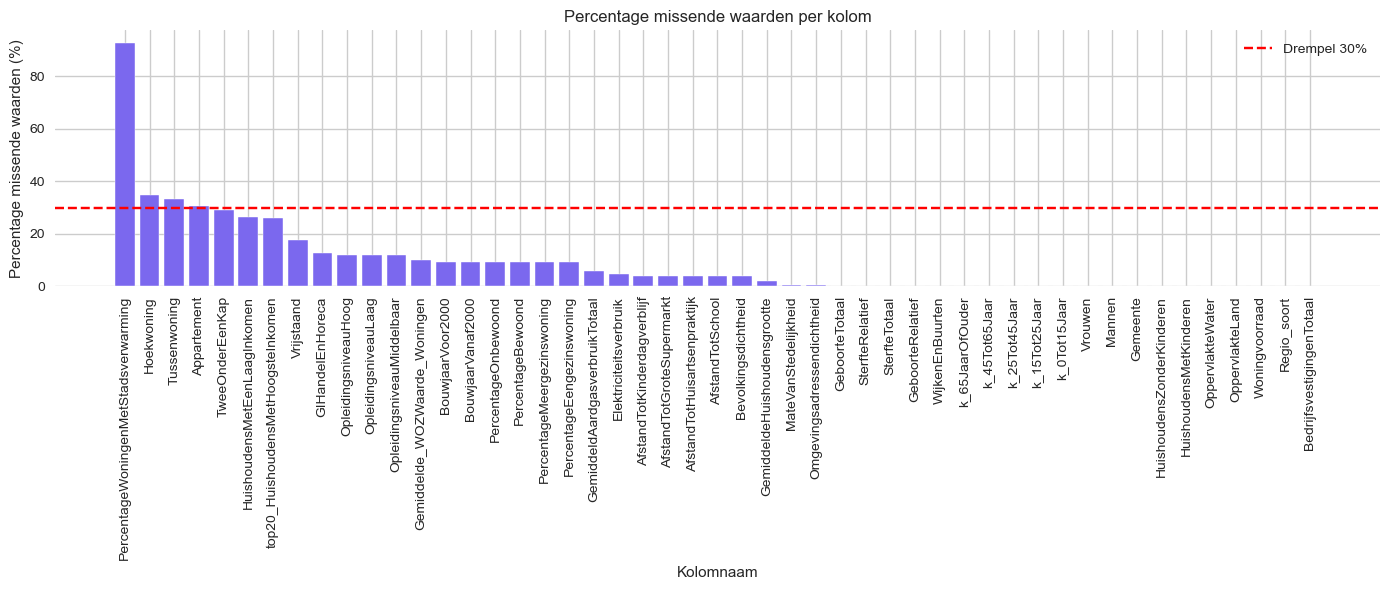

Kolommen die verwijderd worden vanwege te veel missende waarden (>30%):
 ['PercentageWoningenMetStadsverwarming']

Nieuwe datasetvorm na verwijderen kolommen: (17341, 49)

Overzicht van missende waarden na verwijderen:
WijkenEnBuurten                          0
Gemeente                                 0
Regio_soort                              0
Bevolkingsdichtheid                    690
Woningvoorraad                           0
Gemiddelde_WOZWaarde_Woningen         1770
PercentageEengezinswoning             1610
PercentageMeergezinswoning            1610
PercentageBewoond                     1610
PercentageOnbewoond                   1610
GIHandelEnHoreca                      2205
AfstandTotHuisartsenpraktijk           697
AfstandTotGroteSupermarkt              697
AfstandTotKinderdagverblijf            697
AfstandTotSchool                       697
OppervlakteLand                          0
OppervlakteWater                         0
MateVanStedelijkheid                    72
Omgevin

In [7]:
# Joris & Lucas
# Verwijderen van kolommen met te veel missende waarden
missing_percent = buurten_raw.isna().mean() * 100
missing_percent_sorted = missing_percent.sort_values(ascending=False)

# Opstellen van een plot voor visualisering
plt.figure(figsize=(14,6))
bars = plt.bar(missing_percent_sorted.index, missing_percent_sorted.values, color='mediumslateblue')
plt.xticks(rotation=90)
plt.ylabel("Percentage missende waarden (%)")
plt.xlabel("Kolomnaam")
plt.title("Percentage missende waarden per kolom")
plt.axhline(y=30, color='red', linestyle='--', label='Drempel 30%')
plt.legend()
plt.tight_layout()
plt.show()
threshold = 30

# Behouden van de kolommen appartement, tussenwoning, en hoekwoning
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
to_keep = [ 'Appartement', 'Tussenwoning', 'Hoekwoning']
cols_to_drop = [item for item in cols_to_drop if item not in to_keep]

print("Kolommen die verwijderd worden vanwege te veel missende waarden (>30%):\n", cols_to_drop)

buurten = buurten_raw.drop(columns=cols_to_drop)

print("\nNieuwe datasetvorm na verwijderen kolommen:", buurten.shape)
print("\nOverzicht van missende waarden na verwijderen:")
print(buurten.isna().sum())

plt.figure(figsize=(14,6))
bars = plt.bar(missing_percent_sorted.index, missing_percent_sorted.values, color='mediumslateblue')
plt.xticks(rotation=90)
plt.ylabel("Percentage missende waarden (%)")
plt.xlabel("Kolomnaam")
plt.title("Percentage missende waarden per kolom")
plt.axhline(y=30, color='red', linestyle='--', label='Drempel 30%')
plt.legend()
plt.tight_layout()
plt.show()---

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

## **2. Inspecteren**

#### **2.1 Dataset inspecteren**

Nu dat wij de dataset hebben gefiltered kunnen we kijken naar de interessante informatie. We beginnen met een gestructueerd overzicht via de `.info()` methode. Dit geeft ons het aantal rijen, kolommen, de hoeveelheid bestaande waarden, en de kolom namen. Dit is essentieel voor het begrijpen en schoonmaken van onze data.

In [8]:
# Lucas
# Aantal rijen en kolommen dataframe
buurten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17341 entries, 0 to 17340
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   WijkenEnBuurten                     17341 non-null  object 
 1   Gemeente                            17341 non-null  object 
 2   Regio_soort                         17341 non-null  object 
 3   Bevolkingsdichtheid                 16651 non-null  float64
 4   Woningvoorraad                      17341 non-null  int64  
 5   Gemiddelde_WOZWaarde_Woningen       15571 non-null  float64
 6   PercentageEengezinswoning           15731 non-null  float64
 7   PercentageMeergezinswoning          15731 non-null  float64
 8   PercentageBewoond                   15731 non-null  float64
 9   PercentageOnbewoond                 15731 non-null  float64
 10  GIHandelEnHoreca                    15136 non-null  float64
 11  AfstandTotHuisartsenpraktijk        16644

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

<!-- Mehmet -->

#### **2.2 Omschrijving van de kolommen**

Onze dataset heeft `17341` rijen en `49` kolommen. Sommige interessante kolommen hebben wij hieronder beschreven met informatie over wat de kolom is, wat voor type data er in zit, welke eenheden de data in is, en of er missende waarden zijn.


| kolomnaam | omschrijving | type | eenheden | missende waarden |
|------------|--------------|-------|-----------|------------------|
| Wijken_Buurt | Toont aantal wijken en buurten, meerdere buurten vormen een wijk | object | aantal | 0 |
| Gemeente | Toont aantal Gemeenten | object | aantal | 0 |
| Regio_soort | Toont het soort regio, dus gemeente, wijk of buurt | object | aantal | 0 |
| Bevolkingsdichtheid | Toont het aantal inwoners per km² | float64 | inwoners/km² | 690 |
| Woningvoorraad | Het totale aantal woningen op 1 januari | int64 | aantal | 0 |
| Gemiddelde_WOZWaarde_Woningen | Gemiddelde waarde van de woning | float64 | euro | 1770 |
| PercentageEengezinswoning | Percentage van eengezingswoningen (elke woning die een gehele pand vormt) | float64 | % | 1610 |
| PercentageMeergezinswoning | Percentage van meergezinswoningen (elke woning die samen met andere woonruimten een geheel pand vormt) | float64 | % | 1610 |
| PercentageBewoond | Toont percentage bewoonde woningen (woningen waar op 1 januari minimaal 1 persoon stond ingeschreven in de BRP) | float64 | % | 1610 |
| PercentageOnbewoond | Toont percentage onbewoonde woningen (woningen waar op 1 januari niemand stond ingeschreven in de BRP) | float64 | % | 1610 |
| GIHandelEnHoreca | Toont het aantal horeca en handel vestigingen| float64 | % | 2205 |
| AfstandTotHuisartsenpraktijk | Toont gemiddelde afstand van alle inwoners in een gebied tot de dichtsbijzijnde huisartsenpraktijk | float64 | km | 697 |
| AfstandTotGroteSupermarkt | Toont gemiddelde afstand van alle inwoners in een gebied tot de dichtsbijzijnde grote supermarkt | float64 | km | 697 |
| AfstandTotKinderdagverblijf | Toont gemiddelde afstand van alle inwoners in een gebied tot het dichtsbijzijnde kinderdagverblijf | float64 | km | 697 |
| AfstandTotSchool | Toont gemiddelde afstand van alle inwoners in een gebied tot de dichtsbijzijnde school | float64 | km | 697 |
| OppervlakteLand | Toont de gecombineerde informatie van bodemgebruik en gemeente-, wijk-, en buurtgrenzen | int64 | m² | 0 |
| OppervlakteWater | Toont oppervlakte van water, het omvat zowel binnen- als buitenwater | int64 | m² | 0 |
| MateVanStedelijkheid | Op grond van de omgevingsadressendichtheid is aan iedere buurt, wijk of gemeente een stedelijkheidsklasse toegekend. De volgende klassenindeling is gehanteerd: 1: zeer sterk stedelijk >= 2 500 adressen per km² 2: sterk stedelijk 1 500 - 2 500 adressen per km² 3: matig stedelijk 1 000 - 1 500 adressen per km² 4: weinig stedelijk 500 - 1 000 adressen per km² 5: niet stedelijk < 500 adressen per km | float64 | index | 72 |
| Omgevingsadressendichtheid | Toont gemiddelde aantal adressen per km² binnen een cirkel met een straal van één kilometer op 1 januari. | float64 | adressen/km² | 72 |
| top20_HuishoudensMetHoogsteInkomen | Toont aandeel personen in particuliere huishoudens die behoren tot de landelijke 20% personen met hoogste persoonlijk inkomen | float64 | % | 4508 |
| HuishoudensMetEenLaagInkomen | Toont aandeel personen in particuliere huishoudens die behoren tot de landelijke 40% van personen met het laagste persoonlijke inkomen | float64 | % | 4583 |
| HuishoudensMetKinderen | Toont de huishouden met kinderen | int64 | aantal | 0 |
| HuishoudensZonderKinderen | Toont de huishouden zonder kinderen | int64 | aantal | 0 |
| OpleidingsniveauLaag | Toont het aantal personen tussen de 15-75 jaar waarvan de hoogst behaalde niveau laag onderwijs betreft (mbo1, praktijkonderwijs) | float64 | % | 1086 |
| OpleidingsniveauMiddelbaar | Toont het aantal personen tussen de 15-75 jaar waarvan de hoogst behaalde niveau middelbaar onderwijs betreft (vmbo, havo, en mbo) | float64 | % | 1081 |
| OpleidingsniveauHoog | Toont het aantal personen tussen de 15-75 jaar waarvan de hoogst behaalde niveau hoog onderwijs betreft (hbo, wo) | float64 | % | 1086 |
| Mannen | Toont aantal mannen | int64 | aantal | 0 |
| Vrouwen | Toont aantal vrouwen | int64 | aantal | 0 |
| k_0Tot15Jaar | Toont aantal personen met een leeftijd tussen 0 en 15 jaar | int64 | aantal | 0 |
| k_15Tot25Jaar | Toont aantal personen met een leeftijd tussen 15 en 25 jaar  | int64 | aantal | 0 |
| k_25Tot45Jaar | Toont aantal personen met een leeftijd tussen 25 en 455 jaar  | int64 | aantal | 0 |
| k_45Tot65Jaar | Toont aantal personen met een leeftijd tussen 45 en 65 jaar  | int64 | aantal | 0 |
| k_65JaarOfOuder | Toont aantal personen met een leeftijd boven de 65 jaar | int64 | aantal | 0 |
| GeboorteTotaal | Het aantal levendgeborenen van 1 januari tot en met 31 december | int64 | aantal | 0 |
| GeboorteRelatief | Het aantal levendgeborenen van 1 januari tot en met 31 december, per 1000 inwoners | int64 | per 1000 inwoners | 0 |
| SterfteTotaal | Toont aantal overledenen van 1 januari tot en met 31 december | int64 | aantal | 0 |
| SterfteRelatief | Toont aantal overledenen van 1 januari tot en met 31 december, per 1000 inwoners | int64 | per 1000 inwoners | 0 |
| GemiddeldElektriciteitsverbruikTotaal | Toont het gemiddeld jaarverbruik voor elektriciteit op individuele aansluitingen van particuliere woningen, zoals berekend vanuit de aansluitingenregisters van de energienetbedrijven | float64 | kWh | 817 |
| GemiddeldAardgasverbruikTotaal | Toont het gemiddeld jaarverbruik voor aardgas van particuliere woningen, zoals berekend uit de aansluitingenregisters van de energienetbedrijven | float64 | m³ | 1006 |
| BouwjaarVoor2000 | Het aantal woningen met bouwjaar voor 2000, uitgedrukt in hele procenten van het totaal aantal woningen. Het percentage is vermeld bij 20 woningen of meer per buurt| float64 | % | 1610 |
| BouwjaarVanaf2000 | Het aantal woningen met bouwjaar 2000 of later, uitgedrukt in hele procenten van het totaal aantal woningen. Het percentage is vermeld bij 20 woningen of meer per buurt | float64 | % | 1610 |
| PercentageWoningenMetStadsverwarming | Toont het percentage woningen dat is aangesloten op stadsverwarming | float64 | % | 16102 |
| GemiddeldeHuishoudensgrootte | Dit gemiddelde is berekend als het aantal in particuliere huishoudens levende personen gedeeld door het aantal particuliere huishoudens. | float64 | personen | 361 |
| Appartement | Toont het aantal appartementen | float64 | % | 5336 |
| Tussenwoning | Toont het aantal tussenwoningen | float64 | % | 5805 |
| Hoekwoning | Toont het aantal hoekwoningen | float64 | % | 6010 |
| TweeOnderEenKapWoning | Toont het aantal twee onder een kap woningen | float64 | % | 5042 |
| VrijstaandeWoning | Toont aantal vrijstaande woningen | float64 | % | 3089 |
| BedrijfsvestigingenTotaal | Toont het totale bedrijfsvestigingen | int64 | aantal | 0 |




#### **2.3 Extra omschrijving numerieke kolommen**

Om nog beter inzicht in de data te krijgen en ook om de data in perspectief te zetten hebben we hieronder laten zien wat de maximale, minimale, gemiddelde, en mediane waardes zijn in alle numerieke kolommen. Een grote afwijking van de mediaan en het gemiddelde komt vaak door uitschieters, zoals we kunnen zien in de kolommen: Bevolkingsdichtheid en Woningvoorraad. Dit komt vooral door de de verschillende formaten van gemeentes, buurten, en de concentratie van mensen. Er zijn nou eenmaal minder hele grote steden en veel kleine regio's.


| kolomnaam | maximum | minimum | gemiddelde | mediaan |
|------------|----------|----------|-------------|----------|
| Bevolkingsdichtheid | 52173.00 | 0.00 | 2873.60 | 1344.00 |
| Woningvoorraad | 7,891,786.00 | 0.00 | 1820.38 | 407.00 |
| Gemiddelde_WOZWaarde_Woningen | 2069.00 | 19.00 | 311.11 | 286.00 |
| PercentageEengezinswoning | 100.00 | 0.00 | 77.01 | 87.00 |
| PercentageMeergezinswoning | 100.00 | 0.00 | 22.99 | 13.00 |
| PercentageBewoond | 100.00 | 0.00 | 94.43 | 96.00 |
| PercentageOnbewoond | 100.00 | 0.00 | 5.57 | 4.00 |
| GIHandelEnHoreca | 349,180.00 | 0.00 | 91.97 | 20.00 |
| AfstandTotHuisartsenpraktijk | 11.30 | 0.00 | 1.69 | 1.20 |
| AfstandTotGroteSupermarkt | 11.20 | 0.00 | 1.54 | 1.00 |
| BouwjaarVoor2000 | 100.00 | 0.00 | 82.80 | 89.00 |
| BouwjaarVanaf2000 | 100.00 | 0.00 | 17.20 | 11.00 |
| PercentageWoningenMetStadsverwarming | 100.00 | 3.00 | 40.42 | 23.60 |
| GemiddeldeHuishoudensgrootte | 9.00 | 1.00 | 2.30 | 2.30 |
| Appartement | 5750.00 | 770.00 | 2218.09 | 2040.00 |
| Tussenwoning | 6280.00 | 790.00 | 2808.92 | 2800.00 |
| Hoekwoning | 6300.00 | 1170.00 | 2968.11 | 2950.00 |
| TweeOnderEenKapWoning | 7130.00 | 1070.00 | 3384.45 | 3340.00 |
| VrijstaandeWoning | 7140.00 | 1230.00 | 4124.62 | 4120.00 |
| BedrijfsvestigingenTotaal | 2,033,385.00 | 0.00 | 468.92 | 110.00 |




<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **2.4 Groeperen kolommen**

Om de dataset beter de begrijpen kunnen wij sommige kolommen, zoals *"Woningtype"* groeperen. Dit helpt ons door meer perspectief te kunnnen geven in de data door middel van gegroepeerde statestieken en door data analyse later makkelijker en duidelijker te maken.

Wij maken hier de groep Gemeente aan doormiddel van de `.groupby()` methode uit <code style="color:#4EC9B0;">pandas</code>.
Daarna kunnen wij door middel van <code style="color:#CE9178;">seaborn</code> en <code style="color:#CE9178;">matplotlib</code> wat visuele overzichten creëeren om meer inzicht te creëeren in de data.

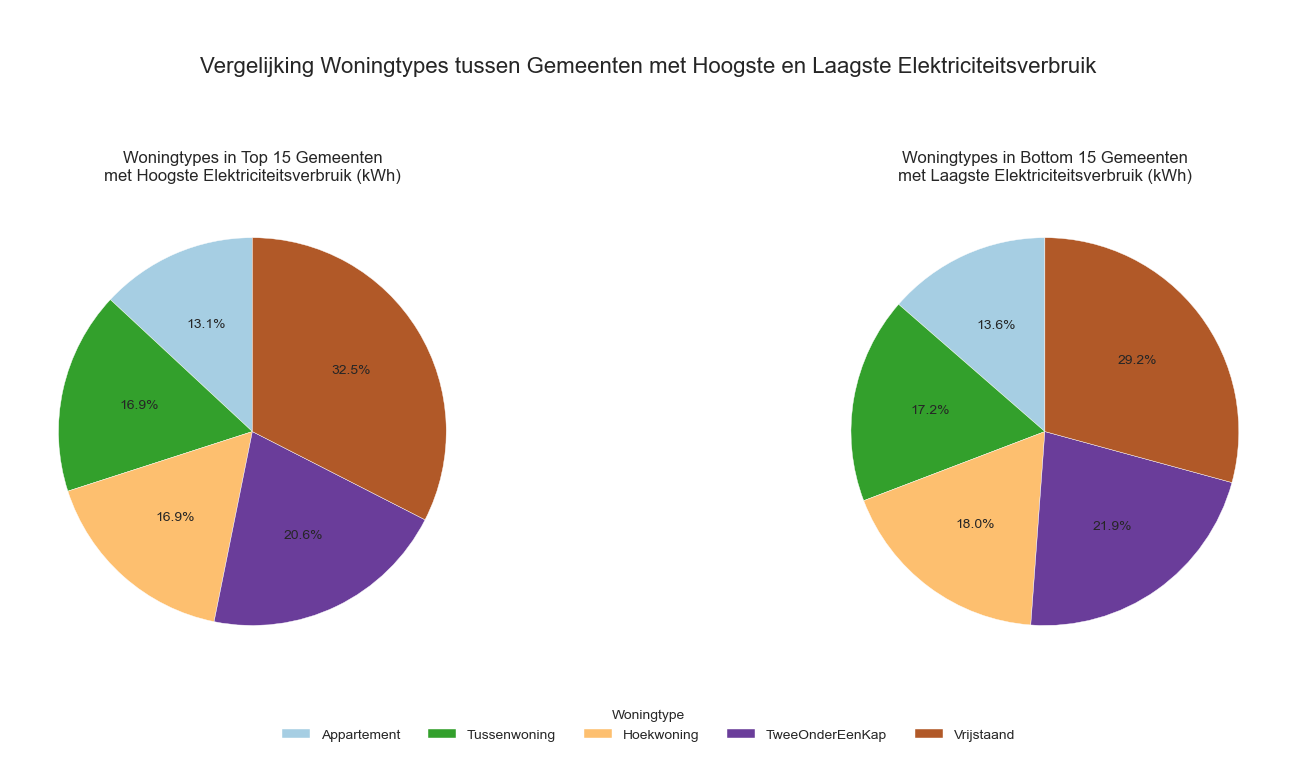

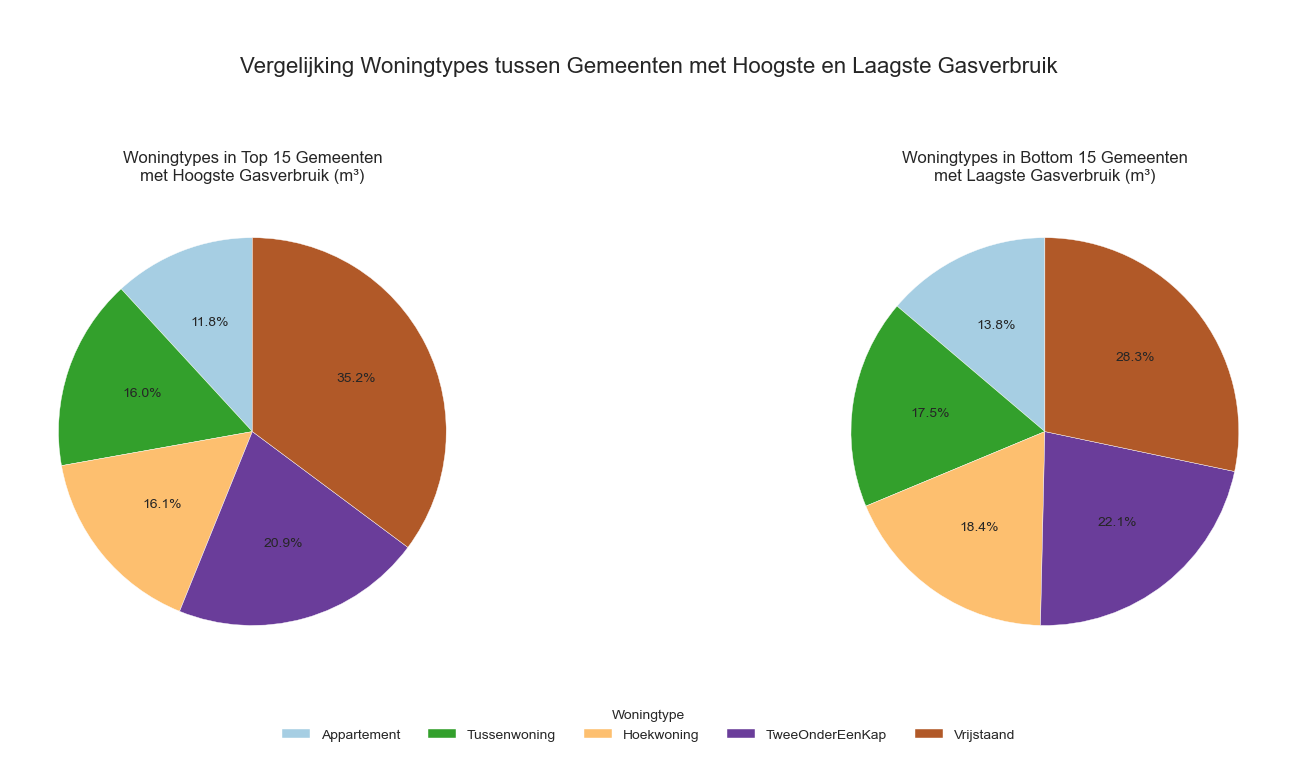

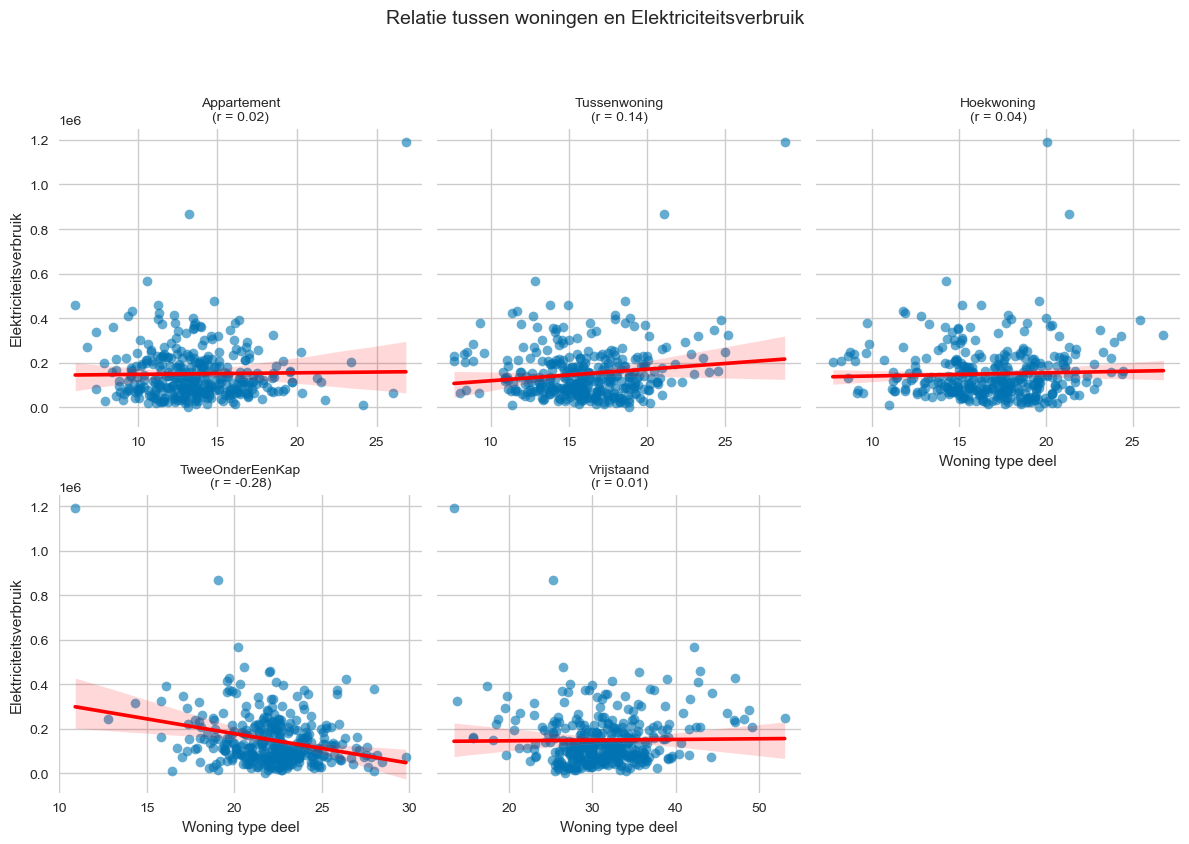

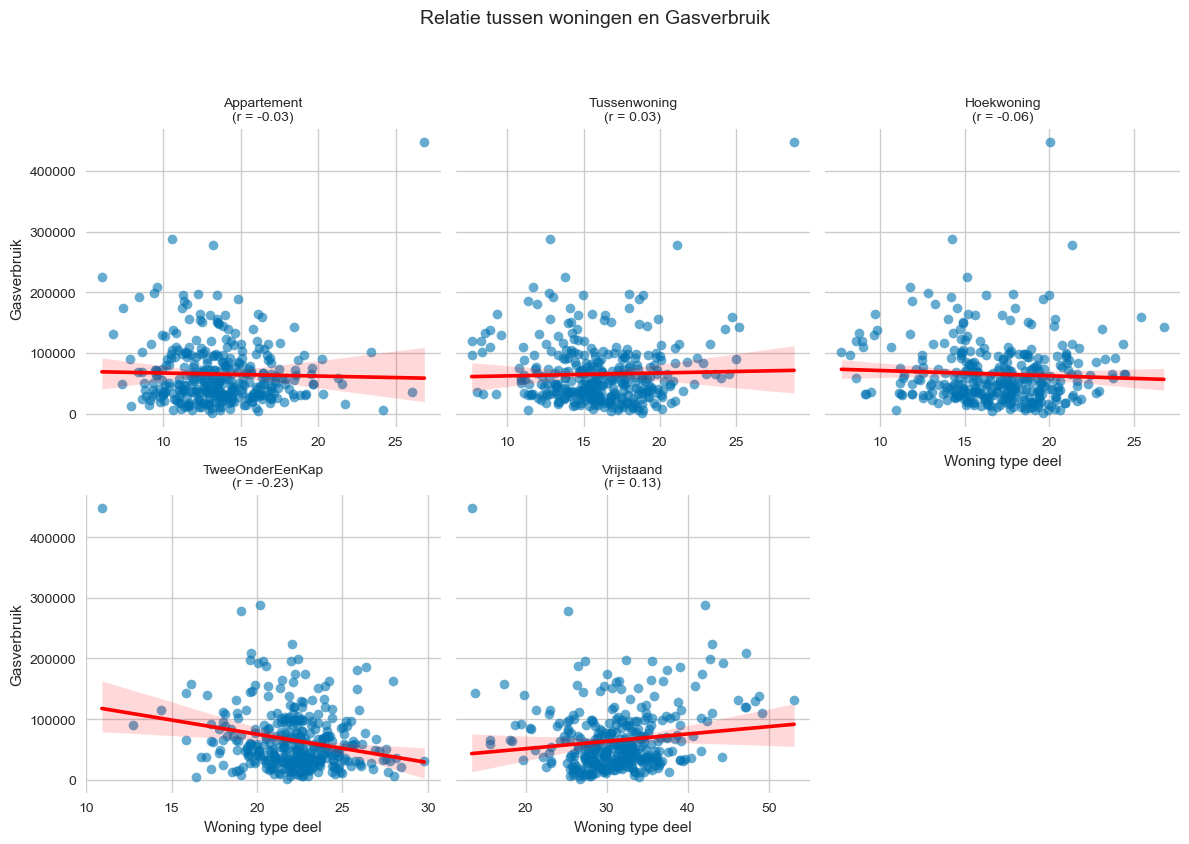

In [9]:
# Lucas

### Dataframe opzetten voor de huizen
woningen = buurten[['WijkenEnBuurten','Gemeente','Elektriciteitsverbruik','Appartement', 'Tussenwoning', 'Hoekwoning', 'TweeOnderEenKap', 'Vrijstaand']].copy()
woning_types = ['Appartement', 'Tussenwoning', 'Hoekwoning', 'TweeOnderEenKap', 'Vrijstaand']
woningen['Gasverbruik'] = df['GemiddeldAardgasverbruikTotaal_55']

woningen_clean = woningen.apply(lambda x: x.str.strip() if x.dtype == "object" else x)          # Het dataframe schoonmaken van de spaties in de benamingen
woningen_clean['Woningentotaal'] = woningen_clean[woning_types].sum(axis = 1)                   # Toevoegen totaal kolom
woningen_clean_gemeente_grouped = woningen_clean.groupby('Gemeente').sum()                      # Creeer een gegroepeerde dataset voor gemeentes
woningen_clean_gemeente_grouped = woningen_clean_gemeente_grouped.drop(['WijkenEnBuurten'], axis = 1)

wcggs = woningen_clean_gemeente_grouped.sort_values('Elektriciteitsverbruik', ascending=False)  # Gesorteerde dataset met een kortere naam
wcggs_perc = wcggs.copy()                                                                       # Kopieer en converteer naar percentage van de huissoorten
for i, col in enumerate(woning_types):
    wcggs_perc[col] = wcggs_perc[col] / wcggs_perc['Woningentotaal'] * 100

def plot_woningtypes_piecharts(verbruik_kolom='Elektriciteitsverbruik', fs = 12):
    # Sorteer data op basis van gekozen verbruikskolom
    sorted_data = woningen_clean_gemeente_grouped.sort_values(verbruik_kolom, ascending=False)
    sorted_data_perc = sorted_data.copy()
    
    # Bereken percentages
    for col in woning_types:
        sorted_data_perc[col] = sorted_data_perc[col] / sorted_data_perc['Woningentotaal'] * 100
    
    # Voorbereiden van de data voor de taartdiagrammen
    top15_data = sorted_data_perc.head(15)
    bottom15_data = sorted_data_perc.tail(15)
    
    # Bereken de gemiddelde percentages voor beide groepen
    top15_avg = top15_data[woning_types].mean()
    bottom15_avg = bottom15_data[woning_types].mean()
    
    # Maak een figuur met twee subplots (twee taartdiagrammen naast elkaar)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Definieer de eenheid
    eenheid = "kWh" if verbruik_kolom == 'Elektriciteitsverbruik' else "m³"
    verbruik_naam = "Elektriciteitsverbruik" if verbruik_kolom == 'Elektriciteitsverbruik' else "Gasverbruik"
    
    # Taartdiagram voor top 15 gemeenten (hoogste verbruik)
    ax1.pie(top15_avg, labels=None, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired(np.linspace(0, 1, len(woning_types))))
    ax1.set_title(f'\n\n\n\n\nWoningtypes in Top 15 Gemeenten\nmet Hoogste {verbruik_naam} ({eenheid})', fontsize=fs)
    
    # Taartdiagram voor bottom 15 gemeenten (laagste verbruik)
    ax2.pie(bottom15_avg, labels=None, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired(np.linspace(0, 1, len(woning_types))))
    ax2.set_title(f'\n\n\n\n\nWoningtypes in Bottom 15 Gemeenten\nmet Laagste {verbruik_naam} ({eenheid})', fontsize=fs)
    
    # Voeg één gezamenlijke legenda toe
    fig.legend(woning_types, title='Woningtype', loc='lower center', bbox_to_anchor=(0.5, 0.05), 
               ncol=len(woning_types))
    
    # Voeg een algemene titel toe
    fig.suptitle(f'\n\nVergelijking Woningtypes tussen Gemeenten met Hoogste en Laagste {verbruik_naam}', 
                 fontsize=16, y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Maak ruimte voor de legenda
    plt.show()

plot_woningtypes_piecharts('Elektriciteitsverbruik')
plot_woningtypes_piecharts('Gasverbruik')

def correlatie_check(st):
    col = woning_types[0]
    # Melt de data in een langer formaat voor plotten
    df_long = wcggs_perc.melt(
        id_vars=st,
        value_vars=woning_types,
        var_name='woning_type',
        value_name='deel'
    )

    # Correlatie check
    correlation = wcggs_perc[col].corr(wcggs_perc[st])

    # zet de grafieken in 1 deel
    g = sns.FacetGrid(df_long, col='woning_type', col_wrap=3, height=4, sharex=False, sharey=True)
    g.map(sns.regplot, 'deel', st, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

    # Geef ze de juiste titels
    for ax, col in zip(g.axes.flat, woning_types):
        correlation = wcggs_perc[col].corr(wcggs_perc[st])
        ax.set_title(f"{col}\n(r = {correlation:.2f})", fontsize=10)

    g.set_axis_labels("Woning type deel", st)
    g.figure.suptitle("Relatie tussen woningen en " + st, fontsize=14, y=1.05)
    g.tight_layout()
    plt.show()

correlatie_check('Elektriciteitsverbruik')
correlatie_check('Gasverbruik')

Er lijkt geen sterke correlatie te zijn tussen elektriciteitsgebruik in gemeenten en een specifieke woning soort. Wel kunnen we kijken naar het elektriciteitsverbruik relatief tot de woning soorten. Hieruit blijken een paar inzichten:

**Belangrijkste bevindingen:**

- Er is een zwakke positieve correlatie tussen 'Tussen woningen' (rijtjeshuizen) en het elektriciteitsverbruik.

- Er is bijna een matige negatieve correlatie tussen de Twee onder een kap woningen en het elektriciteitsverbruik en Gasgebruik.

- Vrijstaande woningen gebruiken niet meer elektriciteit, maar wel meer gas.

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **2.5 Basisstatistieken per gemeente**

Om de data verder te verkennen gaan we nu wat meer basisstatistieken opzoeken over de gemeentes. We gaan de totalen, gemiddleden, en medianen berekenen doormiddel van <code style="color:#4EC9B0;">pandas</code>. Deze geven ons inzicht in verschillen tussen gemeenten. Daaruit kunnen wij conclusies of voorspellingen halen.

Wij hebben de volgende ondervindingen gedaan:

- Het percentage mannen en vrouwen is per gemeente relatief goed verdeeld. Tussen de 47 en de 53%
- Er lijkt geen correlatie te zijn tussen het aantal woningen en de verdeling van mannen en vrouwen, of het elektriciteitsgebruik.
- Er lijken grote verschillen te zijn in leeftijds percentages per gemeente, mogelijk kunnen wij hier nog meer informatie uit halen.
- Er lijkt ook een lichte positieve correlatie te zijn tussen inwoners met een leeftijd van 25-45 en verschillende appartementen, hoekwoningen, en tussenwoningen.

Wij hebben de percentage mannen en vrouwen cijfers ook vergeleken met de cijfers op het CBS en die komen tot minimaal 2 decimalen allemaal overeen.

De cijfers van de leeftijds groepen per gemeente zaten een paar kleine veranderingen in (tot max 2%) wegens de leeftijd van onze dataset. De data op het CBS is uit 2025.

In [10]:
#Mehmet & Lucas

# Basisstatistieken:
# Groeperen op gemeenten
buurten_grouped = buurten.groupby('Gemeente').sum()

# Percentages uitrekenen
buurten_grouped['perc_mannen'] = ((buurten_grouped['Mannen'] / (buurten_grouped['Mannen'] + buurten_grouped['Vrouwen'])) * 100).round(2)
buurten_grouped['perc_vrouwen'] = ((buurten_grouped['Vrouwen'] / (buurten_grouped['Mannen'] + buurten_grouped['Vrouwen'])) * 100).round(2)

buurten_grouped.describe().round(2)

,Bevolkingsdichtheid,Woningvoorraad,Gemiddelde_WOZWaarde_Woningen,PercentageEengezinswoning,PercentageMeergezinswoning,PercentageBewoond,PercentageOnbewoond,GIHandelEnHoreca,AfstandTotHuisartsenpraktijk,AfstandTotGroteSupermarkt,...,BouwjaarVanaf2000,GemiddeldeHuishoudensgrootte,Appartement,Tussenwoning,Hoekwoning,TweeOnderEenKap,Vrijstaand,BedrijfsvestigingenTotaal,perc_mannen,perc_vrouwen
count,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00,...,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00
mean,134405.54,88671.75,13607.62,3402.87,1015.95,4172.52,246.29,3910.48,78.78,71.93,...,760.08,109.51,74798.20,91021.60,94471.01,116925.14,165123.68,22841.26,49.79,50.21
std,379981.09,428378.95,14568.94,2460.53,2499.94,3790.80,283.40,19000.16,72.36,65.53,...,828.20,93.37,72797.39,91146.79,84137.75,78935.29,113194.83,111869.69,0.77,0.77
min,517.00,1737.00,271.00,64.00,6.00,96.00,4.00,60.00,1.00,0.90,...,17.00,2.10,1990.00,2850.00,2970.00,3290.00,4040.00,480.00,47.07,47.17
25%,20489.00,27448.50,6451.50,1660.00,233.25,1882.25,99.00,1238.75,34.78,30.40,...,314.00,49.30,36852.50,40050.00,41510.00,63382.50,82387.50,7223.75,49.38,49.73
50%,55977.00,40482.00,10778.00,2774.50,501.50,3289.00,179.50,1857.50,54.90,52.55,...,556.50,87.35,60635.00,67845.00,72170.00,101925.00,141000.00,10347.50,49.81,50.19
75%,141237.50,66438.75,17578.50,4589.75,985.25,5367.50,295.25,3043.75,93.78,89.65,...,919.75,143.33,93952.50,116670.00,122467.50,150935.00,221685.00,17105.00,50.27,50.62
max,6461879.00,7891786.00,225438.00,17636.00,41881.00,46903.00,3896.00,349180.00,593.70,523.50,...,10508.00,1020.40,1017380.00,1092070.00,760410.00,604060.00,801230.00,2033385.00,52.83,52.93


In [11]:
# Lucas
# Leeftijden
# Bereken het percentage van elke leeftijdsgroep per gemeente
age_cols = ['k_0Tot15Jaar', 'k_15Tot25Jaar', 'k_25Tot45Jaar', 'k_45Tot65Jaar', 'k_65JaarOfOuder']
total_people = buurten_grouped[age_cols].sum(axis=1)
percentages = buurten_grouped[age_cols].div(total_people, axis=0) * 100
percentages.columns = [col + '_perc' for col in age_cols]
print('Percentage van elke leeftijdsgroep per gemeente:')
display(percentages)

Percentage van elke leeftijdsgroep per gemeente:


,k_0Tot15Jaar_perc,k_15Tot25Jaar_perc,k_25Tot45Jaar_perc,k_45Tot65Jaar_perc,k_65JaarOfOuder_perc
Gemeente,,,,,
's-Gravenhage,16.956484,12.450114,30.094830,25.867956,14.630616
's-Hertogenbosch,15.270178,11.605120,26.919142,28.020185,18.185374
Aa en Hunze,13.580975,10.343291,17.190776,32.388627,26.496331
Aalsmeer,17.505022,11.777076,22.203507,29.957943,18.556453
Aalten,15.560418,11.240334,20.055077,30.606951,22.537220
...,...,...,...,...,...
Zundert,13.094911,11.252557,21.496169,31.854260,22.302103
Zutphen,14.913696,11.688248,21.418140,29.919190,22.060726
Zwartewaterland,20.439318,13.939171,23.626212,24.878049,17.117249


In [12]:
# Lucas
# Percentages hoogste vrouwen
buurten_grouped[['Mannen','Vrouwen','perc_mannen','perc_vrouwen']].sort_values('perc_mannen')

,Mannen,Vrouwen,perc_mannen,perc_vrouwen
Gemeente,,,,
Laren,15940,17922,47.07,52.93
Heemstede,38620,43089,47.27,52.73
Wassenaar,37343,41572,47.32,52.68
Maastricht,174385,190370,47.81,52.19
Rijswijk,78492,84853,48.05,51.95
...,...,...,...,...
Asten,25760,24401,51.35,48.65
Sint Anthonis,18002,16982,51.46,48.54
Eindhoven,362354,340835,51.53,48.47


In [13]:
#Lucas
# Percentages hoogste mannen
buurten_grouped[['Mannen','Vrouwen','perc_mannen','perc_vrouwen']].sort_values('perc_vrouwen')

,Mannen,Vrouwen,perc_mannen,perc_vrouwen
Gemeente,,,,
Delft,164233,146612,52.83,47.17
Terschelling,7585,7093,51.68,48.32
Eindhoven,362354,340835,51.53,48.47
Sint Anthonis,18002,16982,51.46,48.54
Asten,25760,24401,51.35,48.65
...,...,...,...,...
Rijswijk,78492,84853,48.05,51.95
Maastricht,174385,190370,47.81,52.19
Wassenaar,37343,41572,47.32,52.68


In [14]:
# Lucas
# Correlatie tussen precentage mannen en vrouwen en de woning types

perc_cols = ['perc_mannen', 'perc_vrouwen'] + age_cols
corr_cols = woning_types + ['Elektriciteitsverbruik']

# Select de relevante kolommen
corr_df = pd.merge(buurten_grouped[corr_cols + perc_cols].copy(), percentages, on='Gemeente')

# maak de correlatie matrix
correlation_table = corr_df.corr().loc[corr_cols, perc_cols]
print('Correlatie tussen woningtypes en percentage mannen/vrouwen per gemeente:')
display(correlation_table)

Correlatie tussen woningtypes en percentage mannen/vrouwen per gemeente:


,perc_mannen,perc_vrouwen,k_0Tot15Jaar,k_15Tot25Jaar,k_25Tot45Jaar,k_45Tot65Jaar,k_65JaarOfOuder
Appartement,-0.021161,0.021161,0.132467,0.149180,0.197919,0.119922,0.088649
Tussenwoning,-0.083468,0.083468,0.137449,0.154279,0.197742,0.124050,0.094088
Hoekwoning,-0.095272,0.095272,0.122758,0.138063,0.171563,0.109393,0.083358
TweeOnderEenKap,0.024543,-0.024543,0.057872,0.068698,0.081859,0.050396,0.035371
Vrijstaand,0.082389,-0.082389,0.035027,0.044309,0.052406,0.030490,0.019885
Elektriciteitsverbruik,0.067341,-0.067341,0.081194,0.094879,0.124287,0.073744,0.052855


---

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

## 3. **Voorlopige conclusie**

Deze analyse heeft nu al een paar patronen bevonden op het gebruik van elektriciteit en gas. Bijvoorbeeld in het bouwen van huizen zijn twee onder een kap woningen het efficients voor elektriciteit én gas gebruik. Gemeenten zouden kunnen focussen op deze woningsoorten vaker te bouwen om de druk op het elektriciteits en gas-net te verlagen.

**Belangrijkste prestaties:**

<!-- Placeholders -->

- Er zijn `17341` observaties verwerkt, waarmee `97,9%` van de oorspronkelijke dataset is behouden.
- We hebben al veel informatie en data kunnen visualiseren en bruikbare informatie kunnen vaststellen.
- Correlaties tussen elektriciteits- en gas-verbruik en woningsoorten zijn gevonden.
- Er zijn 356 gemeenten in kaart gebracht, waarbij wij de percentages van gender en leeftijdsgroepen zijn berekend.
- Van deze gemeenten zijn er ook correlatiecoëfficienten berekend van verschillende statestieken.

---

# **Sprint 4 - Data Exploration**

<div style="line-height:1.6;">

### **Kernpuntenrapport**

Dit hoofdstuk presenteert meerdere visulisaties en correlaties tussen verschillende variabelen en statestieken in de data. Dit hoofdstuk laat dus visueel en doormiddel van cijfers zien welk verhaal de data verteld.

**Belangrijkste bevindingen**:

- 
- 
- 
- 

Deze patronen benadrukken 

---

<div style="line-height:1.6;">

## **4. Basisstatestieken**

#### **4.1 Gemiddelde grootte huishouden in Nederland**
##### **We gaan hier het gemiddelde aantal mensen in een huis in Nederland berekenen.**



In [15]:
# Thomas


<div style="line-height:1.6;">

#### **4.2 Aantal inwoners per stedelijkheidscategorie**

In [16]:
# Thomas

#### **4.3 Gemiddelde elektriciteitsverbruik van een huishouden in Nederland**

In [17]:
# Thomas

---

<div style="line-height:1.6;">

## **5. Correlaties**

#### **5.1 Correlatie tabel**



In [18]:
# Joris

<div style="line-height:1.6;">

#### **5.2 Visualisatie sterkst correlerende variablen**


In [19]:
# Joris

<div style="line-height:1.6;">

#### **5.3 Relatie tussen de categoriale variabelen en elektriciteitsverbruik**


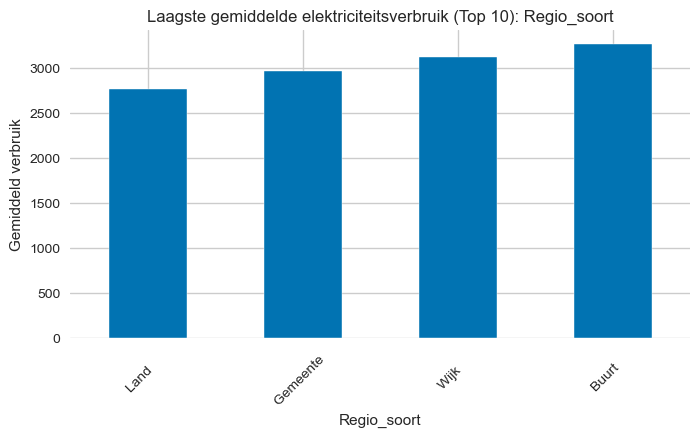

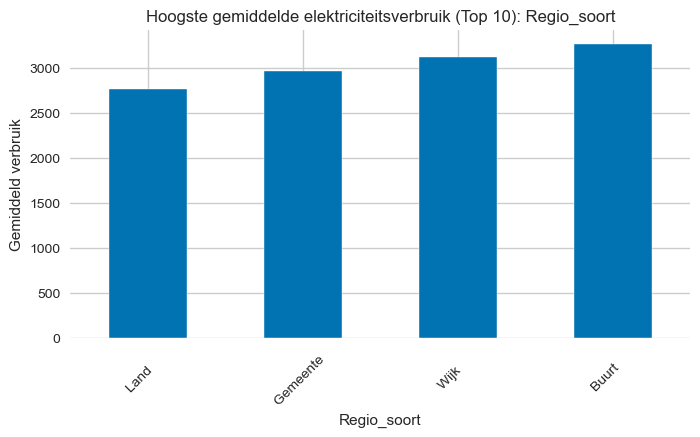

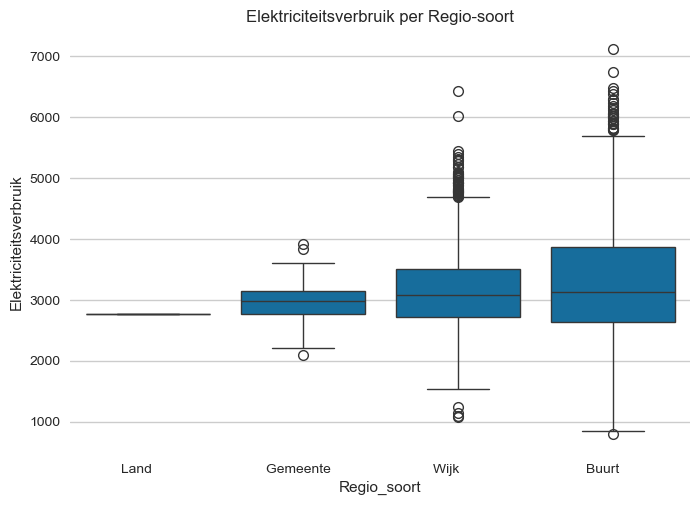

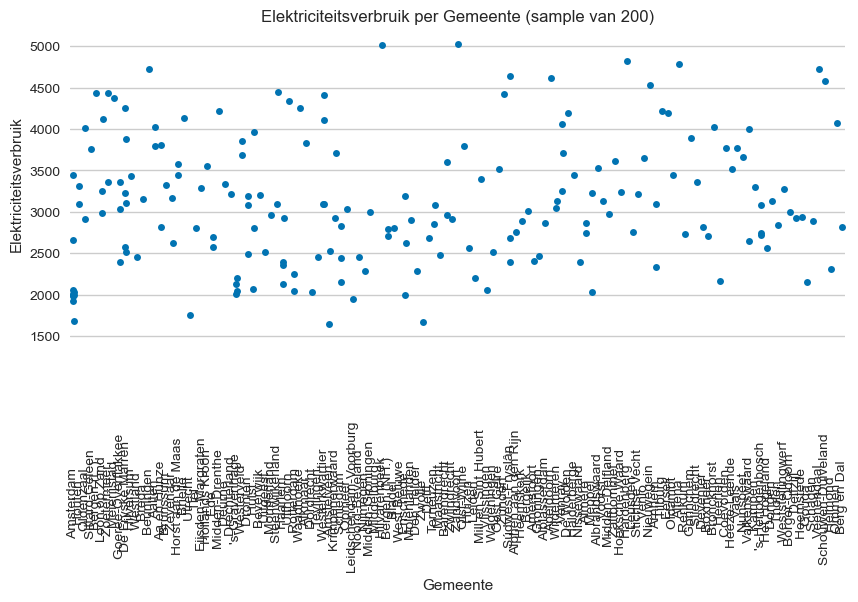

In [ ]:
# Mehmet
cat_cols = ['WijkenEnBuurten', 'Gemeente', 'Regio_soort']
buurten_cat = buurten[cat_cols].copy()
buurten_cat



<div style="line-height:1.6;">

#### **5.4 Visualisatie elektriciteitsgebruik per stedelijkheidsniveau**


In [21]:
# Joris

---

<div style="line-height:1.6;">

## **6. Verdelingen**

Hieronder tonen wij de verdelingen van de 10 numerieke variabelen die het meeste invloed hebben op het elektriciteitsverbruik.

In [22]:
# Mehmet

---

<div style="line-height:1.6;">

## **7. Onderbouwde visualisaties**

#### **7.1 Inwoners per gemeente**


In [23]:
# Lucas

<div style="line-height:1.6;">

#### **7.2 Inwoners per stedelijkheidscategorie**

In [24]:
# Lucas

<div style="line-height:1.6;">

#### **7.3 Drie grafieken die beter inzicht in de data geven**

In [25]:
# Lucas

---

<div style="line-height:1.6;">

## **8. Conclusie** 

Dit is onze voorlopige conclusie:

**Opvallende zaken:**

- 
- 
- 

**Voorlopig antwoord op de hoofdvraag:**

xx xxx xxxx

# **Sprint 5**

# **Sprint 6**

### Eindadvies